<a href="https://colab.research.google.com/github/IshantWadhwa4/Finance-Analytics/blob/master/Credit_Default_Risk_Analysis_its_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1.   [Problem Statment](#Section1)
2.   [Data Acquisition & Description](#Section2)
3.   [Data Pre-processing](#Section3)
4.   [Pre-Exploratory Data Analysis](#Section4)
5.   [Post Data Processing & Analysis](#Section5)
6.   [Model Evaluation](#Section6)

## 1. Problem Statement


IndNatBank is a peer to peer loan financial company who provides loan to its potential customers all over the India. They make profit based on the risk they issues loans to the borrowers. Based on the previous data they want to analyze the risk of issuing loans to the new customers which at the same time also helps to improve the personalization user experience while applying for loans.

They have experienced employees who uses the complex rules to provide services to their customers. But as the size of data will increase their traditional ways of assessing risk might not be good for the company. They wants to automate their process by which machine learns the pattern out of their data for better customer experience.

Now the question is how this problem could be solved using Machine Learning? While there are many ways to assess the credit loan risk and its depiction. We will be working with a simple scenario to solve this problem.

## 2. Data Acquisition & Description

In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv'
data = pd.read_csv(filepath_or_buffer=url)

## 3. Data Pre-processing

#### Basic Info

In [0]:
data.shape

(887379, 22)

In [0]:
data.head()
# Task 1: date_final column is not in correct form

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [0]:
data.info()
# No null value
# Task 2: Data type is not correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
cust_id              887379 non-null int64
year                 887379 non-null int64
state                887379 non-null object
date_issued          887379 non-null datetime64[ns]
date_final           887379 non-null datetime64[ns]
emp_duration         887379 non-null float64
own_type             887379 non-null object
income_type          887379 non-null object
app_type             887379 non-null object
loan_purpose         887379 non-null object
interest_payments    887379 non-null object
grade                887379 non-null object
annual_pay           887379 non-null int64
loan_amount          887379 non-null int64
interest_rate        887379 non-null float64
loan_duration        887379 non-null object
dti                  887379 non-null float64
total_pymnt          887379 non-null float64
total_rec_prncp      887379 non-null float64
recoveries           887379 non-null

In [0]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

# check for outlier in annual_pay see it has max 95lack and loan amount max is 35000only 
# check outlier in dti

,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00
mean,32465133.06,2014.02,1047089.32,6.05,75027.59,14755.26,13.25,18.16,7558.83,5757.71,45.92,436.72,0.08
std,22827341.72,1.26,45551.49,3.51,64698.15,8435.46,4.38,17.19,7871.24,6625.44,409.69,244.19,0.26
min,54734.00,2007.00,1012008.00,0.50,0.00,500.00,5.32,0.00,0.00,0.00,0.00,15.67,0.00
25%,9206643.00,2013.00,1012016.00,3.00,45000.00,8000.00,9.99,11.91,1914.59,1200.57,0.00,260.70,0.00
50%,34433267.00,2014.00,1012016.00,6.05,65000.00,13000.00,12.99,17.65,4895.00,3215.32,0.00,382.55,0.00
75%,54908135.00,2015.00,1092015.00,10.00,90000.00,20000.00,16.20,23.95,10616.81,8000.00,0.00,572.60,0.00
max,68617057.00,2015.00,1122015.00,10.00,9500000.00,35000.00,28.99,9999.00,57777.58,35000.03,33520.27,1445.46,1.00


In [0]:
def get_number_zeros_null(df):
  '''
       LIb : need pandas lib for this function.

       Input : Only required dataframe for which you want zeros and null for each column       
       Output: dataframe with number of zeros and null
  '''
  null_zero_dict={ }
  null_zero_dict['Number_of_nulls'] = df.isnull().sum()
  null_zero_dict['Number_of_zeros'] = (df==0).astype(int).sum()
  return pd.DataFrame(null_zero_dict).T

In [0]:
get_number_zeros_null(data)
# there is no null value and zeros are seems okay 

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Number_of_nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Number_of_zeros,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,451,17759,18145,862702,0,819950


#### Solve Tasks

In [0]:
# Tasks
# Task 1: date_final column is not in correct format
# Task 2: Data type is not correct
# Task 3: check for outlier in annual_pay see it has max 95lack and loan amount max is 35000only and check outlier in dti

In [0]:
# Task 1 and Task 2
data['date_final'] =  pd.to_datetime(data['date_final'],format= '%d%m%Y')
data['date_issued'] = pd.to_datetime(data['date_issued'])

#### Pandas Profiling

In [0]:
# Pandas profiling
!pip install pandas_profiling==2.5.0

In [0]:
import pandas_profiling
report = pandas_profiling.ProfileReport(data)
#covert profile report as html file
report.to_file("EDA.html")

#### Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def draw_distributionPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_numeric_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    sns.distplot(df[var_name],hist=True,axlabel=var_name)
    ax.set_title(var_name+" Distribution")
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

In [0]:
def get_numeric_data_columns(df):
  '''
      return list of all numeric data columns name
  '''
  return list(df._get_numeric_data().columns)

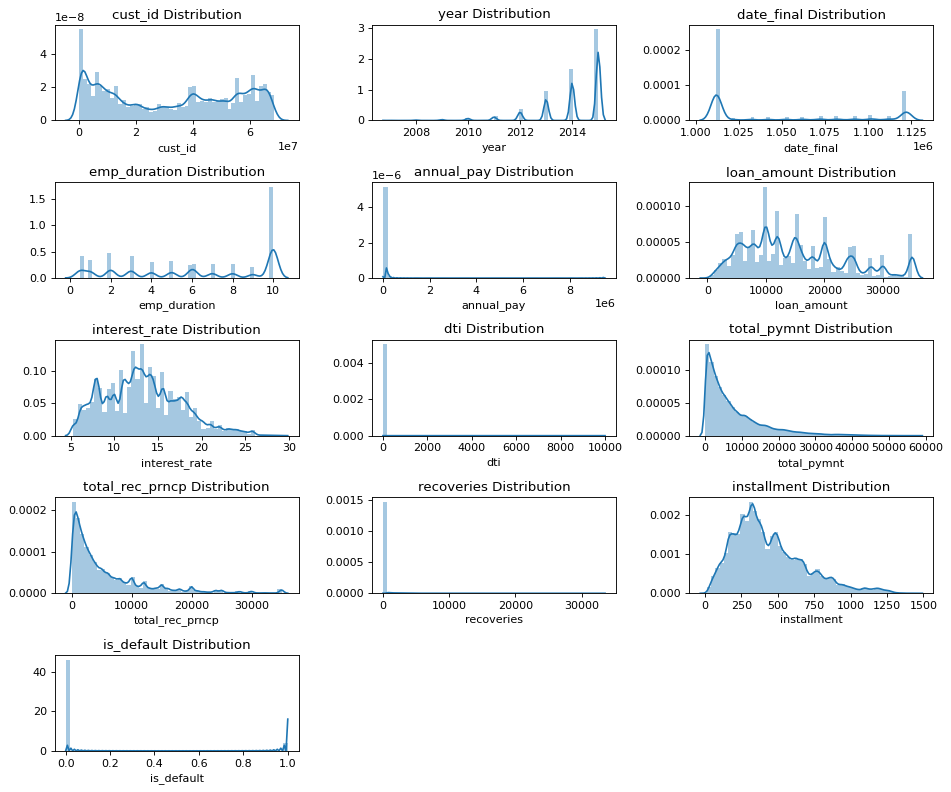

In [0]:
draw_distributionPlot_grid(data)

# Task4: Remove cust_id , we need to scale all the columns  
# Task5: change is_defult type to bool
# Task6: see annual pay 

In [0]:
def draw_countPlot_grid(df):
  import math
  fig=plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
  list_columns = get_catagorical_data_columns(df)
  n_rows = math.ceil(len(list_columns)/3)
  n_cols = 3
  for i, var_name in enumerate(list_columns):
    if len(df[var_name].unique()) < 30:
      ax=fig.add_subplot(n_rows,n_cols,i+1)
      sns.countplot(x = var_name, data=df)
      ax.set_title(var_name)
  fig.tight_layout()  # Improves appearance a bit.
  plt.show()

In [0]:
def get_catagorical_data_columns(df):
  '''
      return list of all catagoric data columns name
  '''
  return list(set(df.columns) - set(df._get_numeric_data().columns))

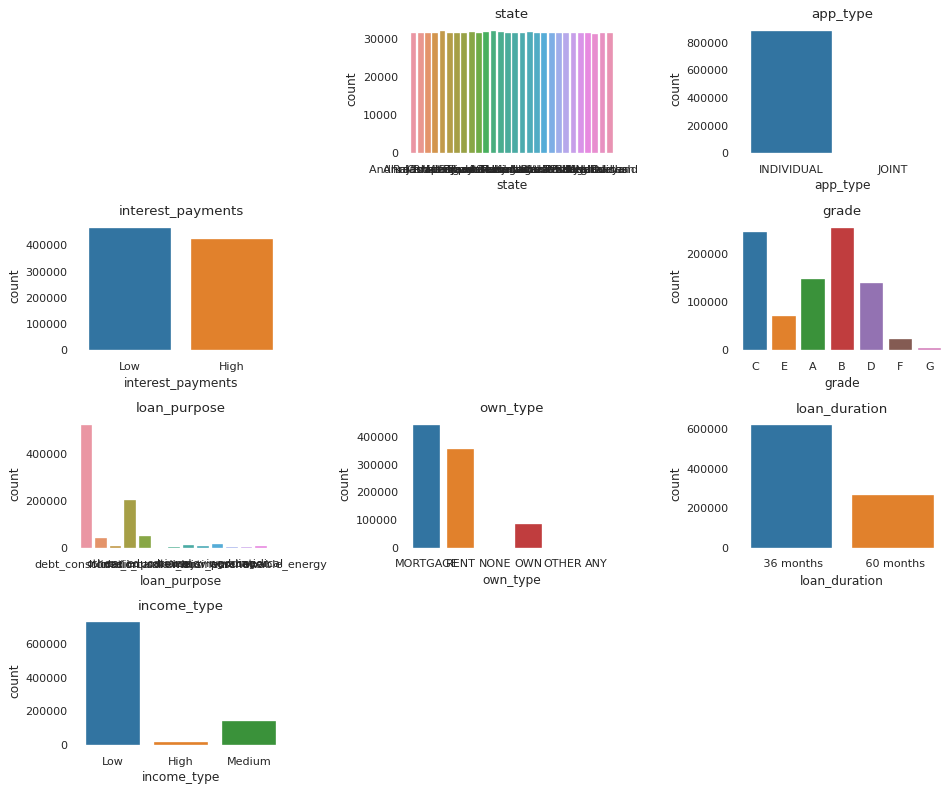

In [0]:
draw_countPlot_grid(data)
# all state has equal distribution
# app_type has max INDIVIDUAL values

In [0]:
def create_seaborn_heatmap_highcorelated(df,posThreshold,negThreshold):
  '''
      create Heatmap for highly co-related(given threshold) columns

      Input: dataframe, positive threshold, negitive threshold
      Plot: Heatmap
  '''
  df_corr = df.corr()
  tempdf = df_corr[(df_corr > posThreshold) | (df_corr < -negThreshold)]
  tempdf.replace(to_replace=1,value=np.nan,inplace=True)
  tempdf.dropna(axis=1,how='all',inplace=True)
  tempdf.dropna(axis=0,how='all',inplace=True)
  sns.heatmap(tempdf,annot=True, cmap="Blues")

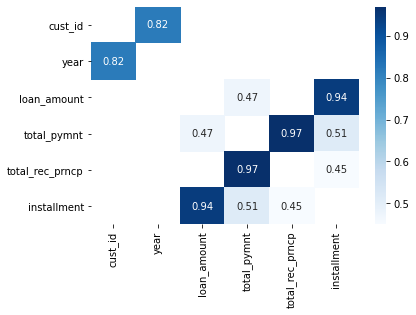

In [0]:
create_seaborn_heatmap_highcorelated(data,0.4,0.6)
# Task7: remove installment,total_rec_prncp

In [0]:
def get_thresholdDiff_outliers(df,quantile_threshold):
  '''
      The main motive is to find difference between max value and the quantile_threshold value and 
      draw a line graph to see is there any possible outlier. 
      
      input: dataframe, quantile_threshold
      output: df with column name and diff of max value and the quantile_threshold
  '''
  columns_numeric = get_numeric_data_columns(df)
  quantile = []
  dict_quantile={}
  for col in columns_numeric:
    dict_quantile[col] = df[col].max() - df[col].quantile(quantile_threshold)
  result = pd.DataFrame(dict_quantile,index=[0]).T
  result['columns_name'] = result.index
  result['Difference'] = result[0]
  result.reset_index(drop=True,inplace=True)
  result.drop([0],axis=1,inplace=True)
  return result

In [0]:
pd.options.display.float_format = "{:.2f}".format
get_thresholdDiff_outliers(data,0.99)
# see annual pay,dti

,columns_name,Difference
0,cust_id,797148.78
1,year,0.00
2,emp_duration,0.00
3,annual_pay,9250000.00
4,loan_amount,0.00
5,interest_rate,4.00
6,dti,9961.52
7,total_pymnt,21182.78
8,total_rec_prncp,5000.02
9,recoveries,31814.08


#### Solve Task

In [0]:
# Task4: Remove cust_id , we need to scale all the columns  
# Task5: change is_default type to bool
# Task6: see annual pay 
# Task7: remove installment,total_rec_prncp

In [0]:
data.drop(['cust_id','installment','total_rec_prncp'],axis=1,inplace=True)

In [0]:
data['is_default'] = data['is_default'].astype(bool)

## 4.Pre Modeling

In [0]:
# Experiment 1: I have highly disbalance data Solve for Dis-balance Data With SMOTE
# Experiment 2: Without SMOTE we use nearmiss algo
# Experiment 3: Without any ALGO

In [0]:
# Smote algo
# 1. Do Encoding
# 2.Scaling the data

# Label Encoding

from sklearn.preprocessing import LabelEncoder
def do_label_Encoding(df,column_list):
  encode = LabelEncoder()
  for col in column_list:
    if isinstance(df[col].dtype, object):
      df[col] = encode.fit_transform(df[col])
  return df

from sklearn.preprocessing import StandardScaler
def do_standardScale(X):
  sc = StandardScaler()
  sc.fit(X)
  x_sc = sc.transform(X)
  x_sc_df = pd.DataFrame(x_sc,columns=X.columns)
  return x_sc_df

import pandas as pd
def do_onehot_Encoding(df,list_columns):
  return pd.get_dummies(data = df, columns = list_columns)

In [0]:
data['own_type'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [0]:
data = do_label_Encoding(data,['state','loan_purpose','grade'])
data = do_onehot_Encoding(data,['own_type','income_type','app_type','interest_payments','loan_duration'])

In [0]:
data.drop(['date_issued','date_final'],axis=1,inplace=True)

In [0]:
X = data.drop('is_default',axis=1)
y = data['is_default']

X_ss = do_standardScale(X)

In [0]:
# SMOTE Algo

from imblearn.over_sampling import SMOTE

def do_smote_algo(X_ss,y,ratio):
  '''
      input:  X_ss standeredScale X value and y is taget variable column
      output: X_new and y with upsampled data use for traing and testing data
  '''
  sm = SMOTE(random_state = 42, ratio = ratio) # here ratio tell the balance and imbalnace class number [We can do experiment on this]
  X,y = sm.fit_sample(X_ss,y)
  X_new = pd.DataFrame(data = X, columns = X_ss.columns)
  return (X_new,y) 

In [0]:
X_new,y_new = do_smote_algo(X_ss,y,1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
pd.value_counts(y_new)

True     819950
False    819950
dtype: int64

## 5.Modeling

In [0]:
# Baseline modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
models_Classification = {
    
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
    
}

In [0]:
y_new = pd.DataFrame(y_new)
y_new = y_new.astype(int)

In [0]:
# Cross validation with SKlearn
from sklearn.model_selection import cross_validate

def do_crossValidation(algo_object,X,y,cv,scoring):
  '''
      Return : return data frame 
  '''
  algo_name = algo_object.__class__.__name__ 
  cc = cross_validate(algo_object, X, y, cv=cv, return_train_score=True, return_estimator=True, n_jobs=-1, scoring=scoring)
  return get_crossValidation_Result(algo_name,cc)

def get_crossValidation_Result(algo_name,result):
  result_dict = {}
  result_dict['Algo Name'] = algo_name
  result_dict['Time'] = result['fit_time'].mean()
  result_dict['Algo Train Accuracy Score']= result['train_score'].mean()
  result_dict['Algo Test Accuracy Score'] = result['test_score'].mean()
  result_dict['Algo Test Accuracy 3*STD'] = result['test_score'].std()*3
  return result_dict 

In [0]:
array_result = []
for count,(key,value) in enumerate(models_Classification.items()):
  result = do_crossValidation(value,X_new,y_new,cv=5,scoring='f1')
  print(result)
  array_result.append(result)
df = pd.DataFrame(array_result)

In [0]:
df

,Algo Name,Time,Algo Train Accuracy Score,Algo Test Accuracy Score,Algo Test Accuracy 3*STD
0,LogisticRegression,13.778386,0.755419,0.703100,0.173559
1,DecisionTreeClassifier,25.937713,1.000000,0.766971,0.183862


## Post Modeling

In [0]:
##  See important featurs for futher improving model 

In [0]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def randomForestBased_FeatureImportance(X,y,max_features):
  embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=max_features)
  embeded_rf_selector.fit(X, y)
  embeded_rf_support = embeded_rf_selector.get_support()
  embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
  return embeded_rf_feature

In [0]:
randomForestBased_FeatureImportance(X_new,y_new,20)